In [1]:
import pandas as pd
import numpy as np
import dtale
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
warnings.filterwarnings('ignore')
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
%matplotlib inline

In [2]:
Data=pd.read_csv("D:\\anacoda dataset\\Retail.csv")
print(Data.head(2))

   Row ID       Order ID  Order Date Customer ID    Customer Name  \
0   42433   AG-2011-2040  01-01-2011    TB-11280  Toby Braunhardt   
1   22253  IN-2011-47883  01-01-2011    JH-15985      Joseph Holt   

          City            State    Country        Product ID         Category  \
0  Constantine      Constantine    Algeria  OFF-TEN-10000025  Office Supplies   
1  Wagga Wagga  New South Wales  Australia   OFF-SU-10000618  Office Supplies   

  Sub-Category              Product Name    Sales  Quantity  Discount   Profit  
0      Storage       Tenex Lockers, Blue  408.300         2       0.0  106.140  
1     Supplies  Acme Trimmer, High Speed  120.366         3       0.1   36.036  


In [3]:
Data=Data.iloc[0:30000,:]
Data.shape

(30000, 16)

In [4]:
#                                             Checking for Null value

Data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Customer ID      0
Customer Name    0
City             0
State            0
Country          0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
#                                  Dropping of features that has no impact on sales

Data=Data.drop(columns=['Row ID','Order ID','Customer ID','Customer Name','Product ID'])
Data

Order Date                 City              State        Country  \
0      01-01-2011          Constantine        Constantine        Algeria   
1      01-01-2011          Wagga Wagga    New South Wales      Australia   
2      01-01-2011             Budapest           Budapest        Hungary   
3      01-01-2011            Stockholm          Stockholm         Sweden   
4      01-01-2011          Wagga Wagga    New South Wales      Australia   
...           ...                  ...                ...            ...   
29995  18-11-2014              Everett      Massachusetts  United States   
29996  18-11-2014            Bangalore          Karnataka          India   
29997  18-11-2014                 Agra      Uttar Pradesh          India   
29998  18-11-2014          Tegucigalpa  Francisco Morazán       Honduras   
29999  18-11-2014  Le Plessis-Robinson      Ile-de-France         France   

              Category Sub-Category  \
0      Office Supplies      Storage   
1      Office Supplies     Supplies   
2      Office Supplies      Storage   
3      Office Supplies        Paper   
4            Furniture  Furnishings   
...                ...          ...   
29995  Office Supplies          Art   
29996       Technology  Accessories   
29997       Technology      Copiers   
29998       Technology       Phones   
29999  Office Supplies   Appliances   

                                            Product Name    Sales  Quantity  \
0                                    Tenex Lockers, Blue  408.300         2   
1                               Acme Trimmer, High Speed  120.366         3   
2                                Tenex Box, Single Width   66.120         4   
3                            Enermax Note Cards, Premium   44.865         3   
4                             Eldon Light Bulb, Duo Pack  113.670         5   
...                                                  ...      ...       ...   
29995  Stanley Bostitch Contemporary Electric Pencil ...   50.940         3   
29996                     Enermax Flash Drive, Erganomic  196.650         5   
29997                                   Canon Ink, Color  148.590         1   
29998                Apple Speaker Phone, with Caller ID   98.640         2   
29999                                Hoover Toaster, Red  225.828         3   

       Discount    Profit  
0           0.0  106.1400  
1           0.1   36.0360  
2           0.0   29.6400  
3           0.5  -26.0550  
4           0.1   37.7700  
...         ...       ...  
29995       0.0   14.2632  
29996       0.0   82.5000  
29997       0.0   28.2300  
29998       0.4  -59.2000  
29999       0.1   -5.0220  

[30000 rows x 11 columns]

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    30000 non-null  object 
 1   City          30000 non-null  object 
 2   State         30000 non-null  object 
 3   Country       30000 non-null  object 
 4   Category      30000 non-null  object 
 5   Sub-Category  30000 non-null  object 
 6   Product Name  30000 non-null  object 
 7   Sales         30000 non-null  float64
 8   Quantity      30000 non-null  int64  
 9   Discount      30000 non-null  float64
 10  Profit        30000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 2.5+ MB


In [7]:
#                                       Changing datatype of order date to datetime

Data['Order Date']=pd.to_datetime(Data['Order Date'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    30000 non-null  datetime64[ns]
 1   City          30000 non-null  object        
 2   State         30000 non-null  object        
 3   Country       30000 non-null  object        
 4   Category      30000 non-null  object        
 5   Sub-Category  30000 non-null  object        
 6   Product Name  30000 non-null  object        
 7   Sales         30000 non-null  float64       
 8   Quantity      30000 non-null  int64         
 9   Discount      30000 non-null  float64       
 10  Profit        30000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 2.5+ MB


In [8]:
#                                     Extracting day of the week from Order Date

Data['Week_Day']=Data['Order Date'].dt.day_name()
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    30000 non-null  datetime64[ns]
 1   City          30000 non-null  object        
 2   State         30000 non-null  object        
 3   Country       30000 non-null  object        
 4   Category      30000 non-null  object        
 5   Sub-Category  30000 non-null  object        
 6   Product Name  30000 non-null  object        
 7   Sales         30000 non-null  float64       
 8   Quantity      30000 non-null  int64         
 9   Discount      30000 non-null  float64       
 10  Profit        30000 non-null  float64       
 11  Week_Day      30000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 2.7+ MB


                                               Exploratory Data Analysis

In [9]:
#                                           Unique value across all columns


columns_name=['No of Unique Values in each feature']
pd.DataFrame(Data.nunique(),columns=columns_name)

No of Unique Values in each feature
Order Date                                    843
City                                         3091
State                                        1005
Country                                       143
Category                                        3
Sub-Category                                   17
Product Name                                 3690
Sales                                       16422
Quantity                                       14
Discount                                       27
Profit                                      16663
Week_Day                                        7

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


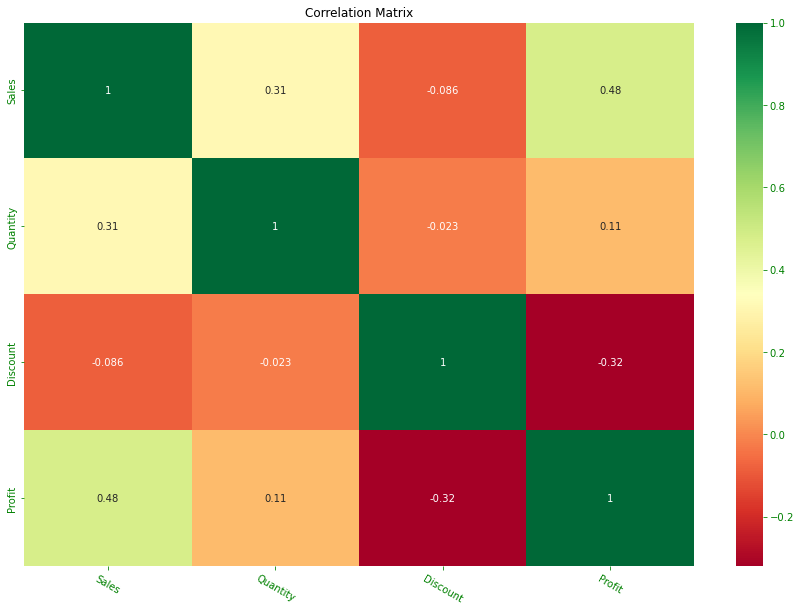

In [10]:
#                                              Corelation - Heatmap


Data.columns.values

categorical=['City', 'State', 'Country', 'Product Name', 'Category', 'Sub-Category', 'Week_Day']
numerical = [x for x in Data.columns.to_list() if x not in categorical]

corr_data = Data[numerical]
corr = corr_data.corr(method='pearson')
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [16]:
df=pd.get_dummies(Data[['Country','Sales']],drop_first=True)
df.head(2)

Sales  Country_Albania  Country_Algeria  Country_Angola  \
0  408.300                0                1               0   
1  120.366                0                0               0   

   Country_Argentina  Country_Armenia  Country_Australia  Country_Austria  \
0                  0                0                  0                0   
1                  0                0                  1                0   

   Country_Azerbaijan  Country_Bangladesh  ...  Country_United Arab Emirates  \
0                   0                   0  ...                             0   
1                   0                   0  ...                             0   

   Country_United Kingdom  Country_United States  Country_Uruguay  \
0                       0                      0                0   
1                       0                      0                0   

   Country_Uzbekistan  Country_Venezuela  Country_Vietnam  Country_Yemen  \
0                   0                  0                0              0   
1                   0                  0                0              0   

   Country_Zambia  Country_Zimbabwe  
0               0                 0  
1               0                 0  

[2 rows x 143 columns]

In [17]:
plt.figure(figsize=(500,100))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

In [13]:
df1=pd.get_dummies(Data[['Category','Sales']],drop_first=True)
df1.head(2)

Sales  Category_Office Supplies  Category_Technology
0  408.300                         1                    0
1  120.366                         1                    0

<AxesSubplot:>

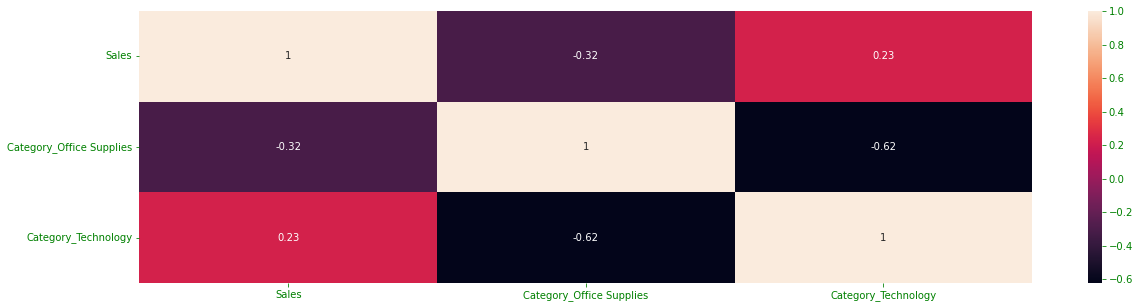

In [14]:
plt.figure(figsize=(20,5))
sns.heatmap(df1.corr(),annot=True)

In [15]:
df2=pd.get_dummies(Data[['Sub-Category','Sales']],drop_first=True)
df2.head(2)

Sales  Sub-Category_Appliances  Sub-Category_Art  Sub-Category_Binders  \
0  408.300                        0                 0                     0   
1  120.366                        0                 0                     0   

   Sub-Category_Bookcases  Sub-Category_Chairs  Sub-Category_Copiers  \
0                       0                    0                     0   
1                       0                    0                     0   

   Sub-Category_Envelopes  Sub-Category_Fasteners  Sub-Category_Furnishings  \
0                       0                       0                         0   
1                       0                       0                         0   

   Sub-Category_Labels  Sub-Category_Machines  Sub-Category_Paper  \
0                    0                      0                   0   
1                    0                      0                   0   

   Sub-Category_Phones  Sub-Category_Storage  Sub-Category_Supplies  \
0                    0                     1                      0   
1                    0                     0                      1   

   Sub-Category_Tables  
0                    0  
1                    0

<AxesSubplot:>

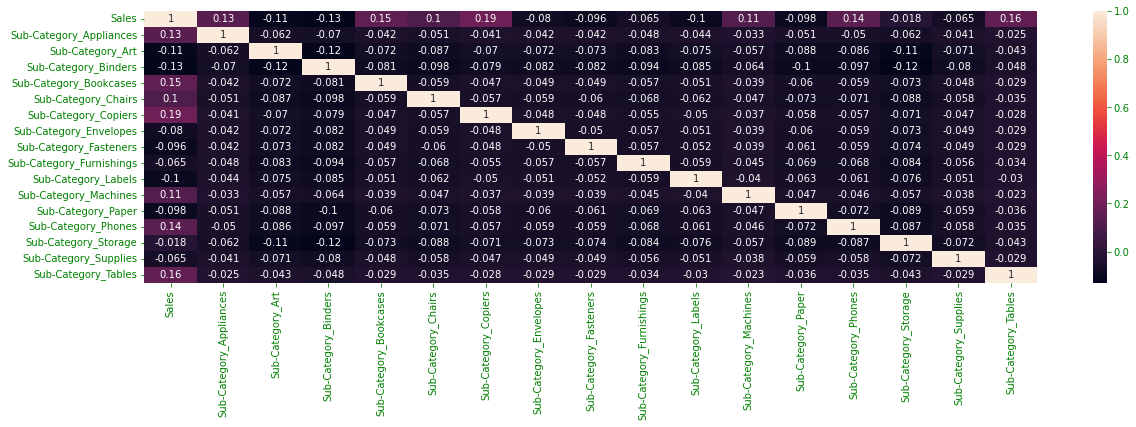

In [16]:
plt.figure(figsize=(20,5))
sns.heatmap(df2.corr(),annot=True)

In [17]:
df3=pd.get_dummies(Data[['Week_Day','Sales']],drop_first=True)
df3.head(2)

Sales  Week_Day_Monday  Week_Day_Saturday  Week_Day_Sunday  \
0  408.300                0                  1                0   
1  120.366                0                  1                0   

   Week_Day_Thursday  Week_Day_Tuesday  Week_Day_Wednesday  
0                  0                 0                   0  
1                  0                 0                   0

<AxesSubplot:>

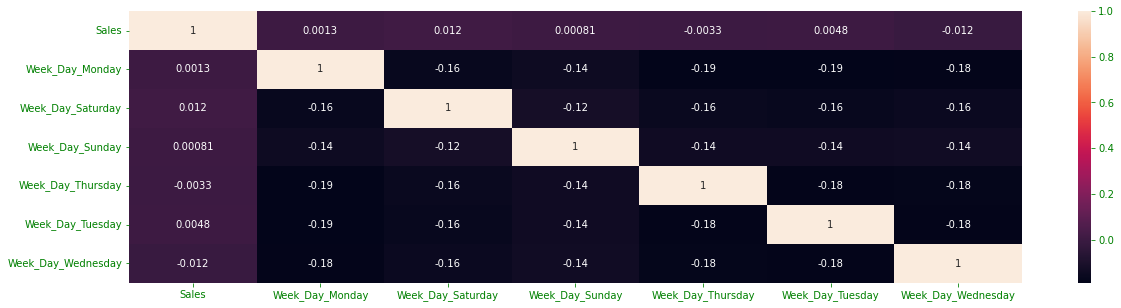

In [18]:
plt.figure(figsize=(20,5))
sns.heatmap(df3.corr(),annot=True)

In [19]:
#                                            Drop unrelated data features

Data=Data.drop(columns=['City'])
Data=Data.drop(columns=['State'])
Data=Data.drop(columns=['Order Date'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30000 non-null  object 
 1   Category      30000 non-null  object 
 2   Sub-Category  30000 non-null  object 
 3   Product Name  30000 non-null  object 
 4   Sales         30000 non-null  float64
 5   Quantity      30000 non-null  int64  
 6   Discount      30000 non-null  float64
 7   Profit        30000 non-null  float64
 8   Week_Day      30000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.1+ MB


In [20]:
#                                             Change to correct data type

Data['Week_Day']=Data['Week_Day'].astype('category')
Data['Country']=Data['Country'].astype('category')
Data['Category']=Data['Category'].astype('category')
Data['Sub-Category']=Data['Sub-Category'].astype('category')
Data['Product Name']=Data['Product Name'].astype('category')
pd.DataFrame(Data).dtypes

Country         category
Category        category
Sub-Category    category
Product Name    category
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Week_Day        category
dtype: object

In [21]:
#                                           Checking for any duplicate

Data.duplicated().sum()

215

In [22]:
Data.shape

(30000, 9)

In [23]:
#                                          Dropping all Duplicate data

Data.drop_duplicates(keep='first').shape

(29785, 9)

In [24]:
#                                             z score stadardizing

z = np.abs(stats.zscore(Data[['Profit','Quantity','Discount']]))
print(z)

         Profit  Quantity  Discount
0      0.449266  0.647437  0.673072
1      0.042632  0.208308  0.201971
2      0.005532  0.230821  0.673072
3      0.317524  0.208308  1.682433
4      0.052689  0.669949  0.201971
...         ...       ...       ...
29995  0.083660  0.208308  0.673072
29996  0.312143  0.669949  0.673072
29997  0.002647  1.086565  0.673072
29998  0.509779  0.647437  1.211332
29999  0.195523  0.208308  0.201971

[30000 rows x 3 columns]


In [25]:
threshold = 3
print(np.where(z > 3))

(array([   61,   105,   106, ..., 29947, 29950, 29969], dtype=int64), array([1, 0, 1, ..., 1, 0, 1], dtype=int64))


In [26]:
Data.iloc[9998,:]

Country                                       India
Category                            Office Supplies
Sub-Category                              Envelopes
Product Name    Kraft Clasp Envelope, Security-Tint
Sales                                          11.4
Quantity                                          1
Discount                                        0.0
Profit                                         0.21
Week_Day                                     Sunday
Name: 9998, dtype: object

In [27]:
#                             Restricting value under threshold of 3 standard deviation

Data = Data[(z < 3).all(axis=1)]
Data.shape

(29016, 9)

In [28]:
Data

Country         Category Sub-Category  \
0            Algeria  Office Supplies      Storage   
1          Australia  Office Supplies     Supplies   
2            Hungary  Office Supplies      Storage   
3             Sweden  Office Supplies        Paper   
4          Australia        Furniture  Furnishings   
...              ...              ...          ...   
29995  United States  Office Supplies          Art   
29996          India       Technology  Accessories   
29997          India       Technology      Copiers   
29998       Honduras       Technology       Phones   
29999         France  Office Supplies   Appliances   

                                            Product Name    Sales  Quantity  \
0                                    Tenex Lockers, Blue  408.300         2   
1                               Acme Trimmer, High Speed  120.366         3   
2                                Tenex Box, Single Width   66.120         4   
3                            Enermax Note Cards, Premium   44.865         3   
4                             Eldon Light Bulb, Duo Pack  113.670         5   
...                                                  ...      ...       ...   
29995  Stanley Bostitch Contemporary Electric Pencil ...   50.940         3   
29996                     Enermax Flash Drive, Erganomic  196.650         5   
29997                                   Canon Ink, Color  148.590         1   
29998                Apple Speaker Phone, with Caller ID   98.640         2   
29999                                Hoover Toaster, Red  225.828         3   

       Discount    Profit  Week_Day  
0           0.0  106.1400  Saturday  
1           0.1   36.0360  Saturday  
2           0.0   29.6400  Saturday  
3           0.5  -26.0550  Saturday  
4           0.1   37.7700  Saturday  
...         ...       ...       ...  
29995       0.0   14.2632   Tuesday  
29996       0.0   82.5000   Tuesday  
29997       0.0   28.2300   Tuesday  
29998       0.4  -59.2000   Tuesday  
29999       0.1   -5.0220   Tuesday  

[29016 rows x 9 columns]

                                                     EDA - Regression plot

<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

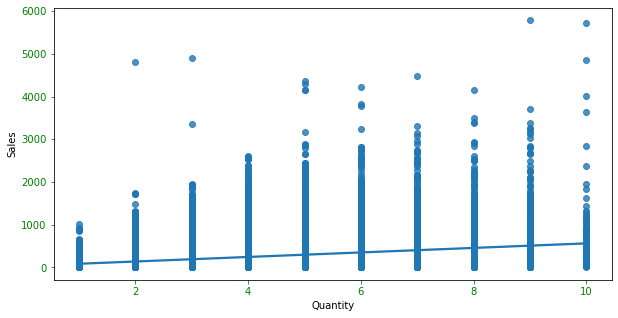

In [29]:
#                                                     Quantity VS Sales 

plt.figure(figsize=(10,5))
sns.regplot('Quantity','Sales',data=Data)

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

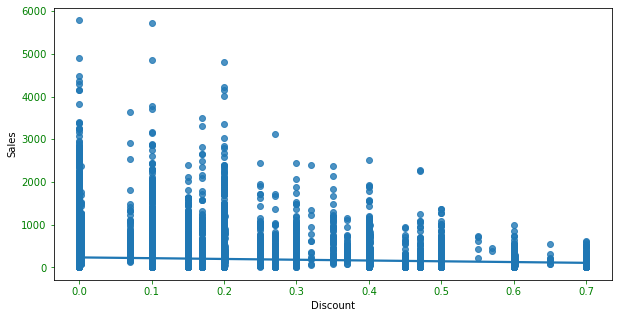

In [30]:
#                                                    Discount VS Sales

plt.figure(figsize=(10,5))
sns.regplot('Discount','Sales',data=Data)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

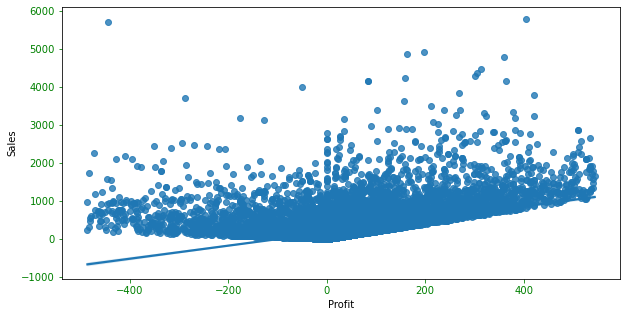

In [31]:
#                                                       Profit VS Sales

plt.figure(figsize=(10,5))
sns.regplot('Profit','Sales',data=Data)

                                                        EDA - Bar Plot

Text(0.5, 1.0, 'Country Wise Sales')

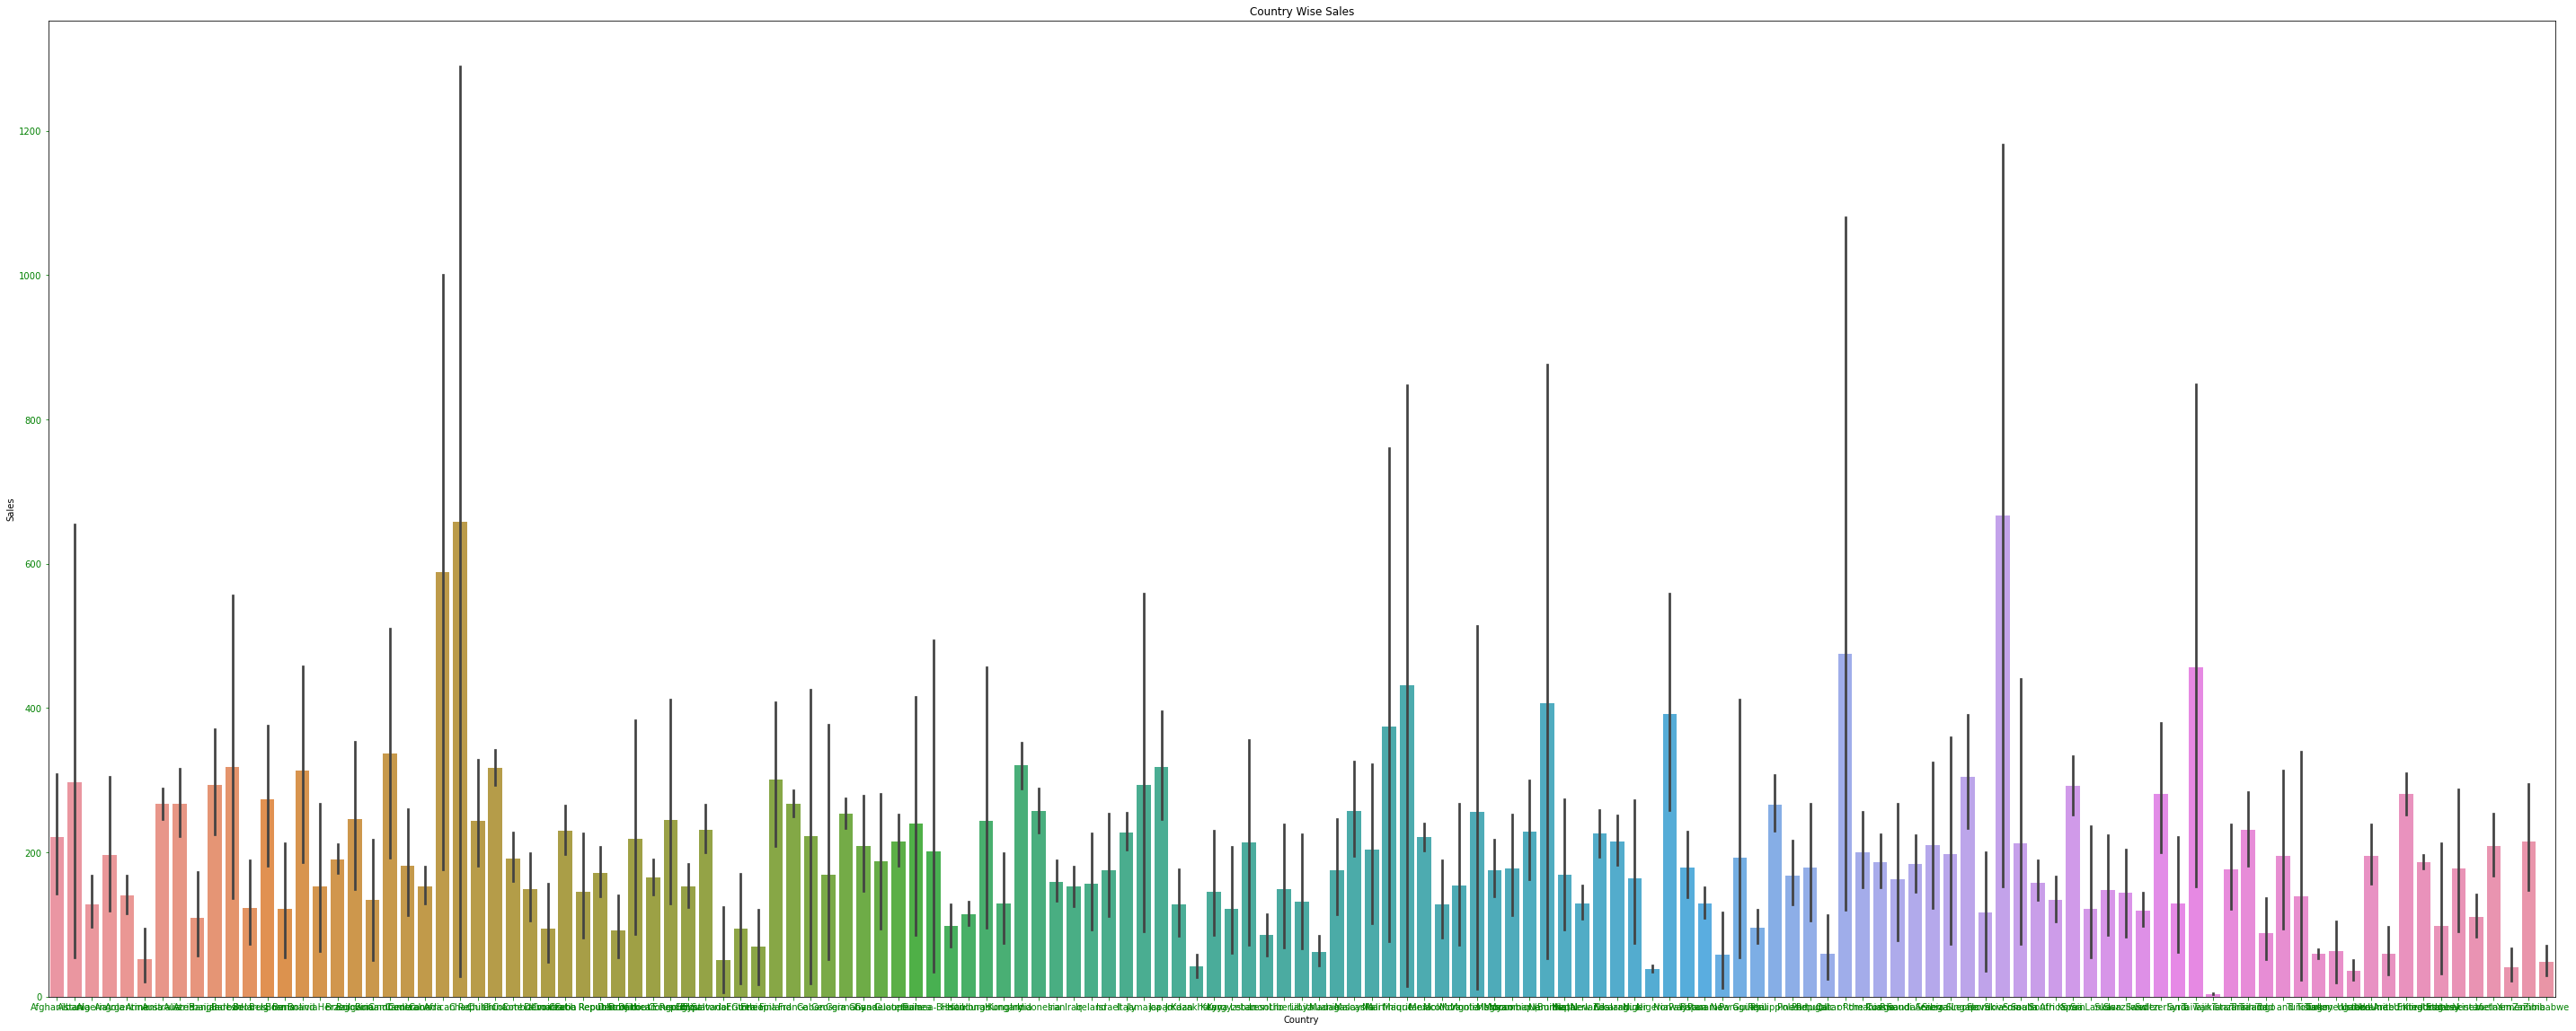

In [32]:
#                                                      Country VS Sales

plt.figure(figsize=(50,20))
sns.barplot(x='Country',y='Sales', data=Data)
plt.title('Country Wise Sales')

Text(0.5, 1.0, 'Category Wise Sales')

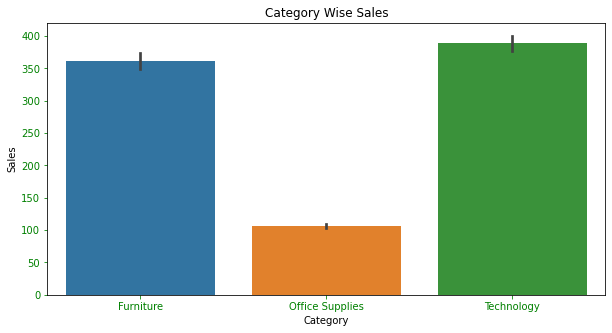

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Sales', data=Data)
plt.title('Category Wise Sales')

Text(0.5, 1.0, 'Sub Category Wise Sales')

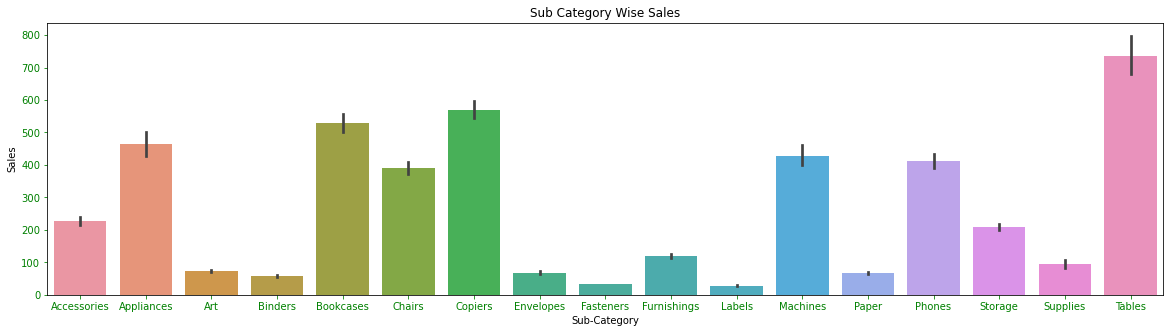

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x='Sub-Category',y='Sales', data=Data)
plt.title('Sub Category Wise Sales')

Text(0.5, 1.0, 'Product Name Wise Sales')

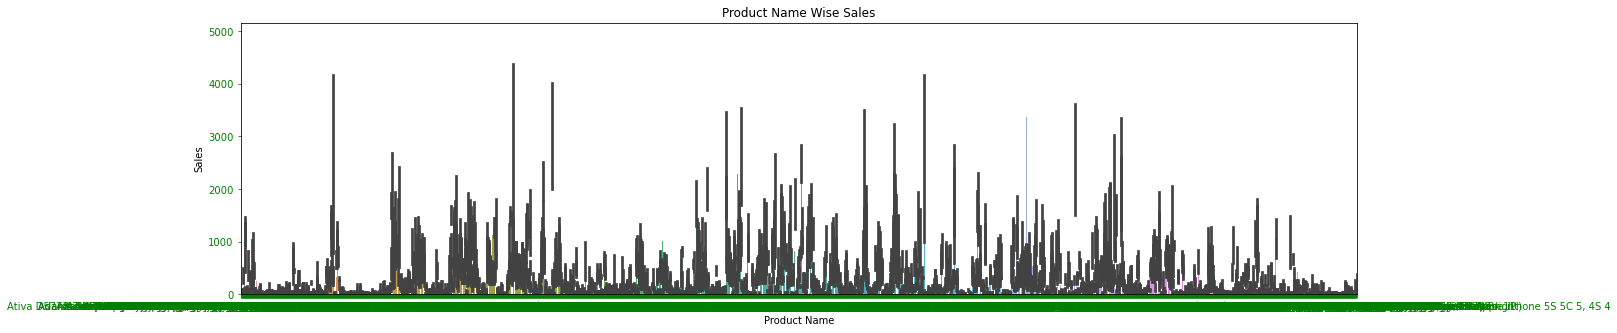

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x='Product Name',y='Sales', data=Data)
plt.title('Product Name Wise Sales')

Text(0.5, 1.0, 'Week_Day Wise Sales')

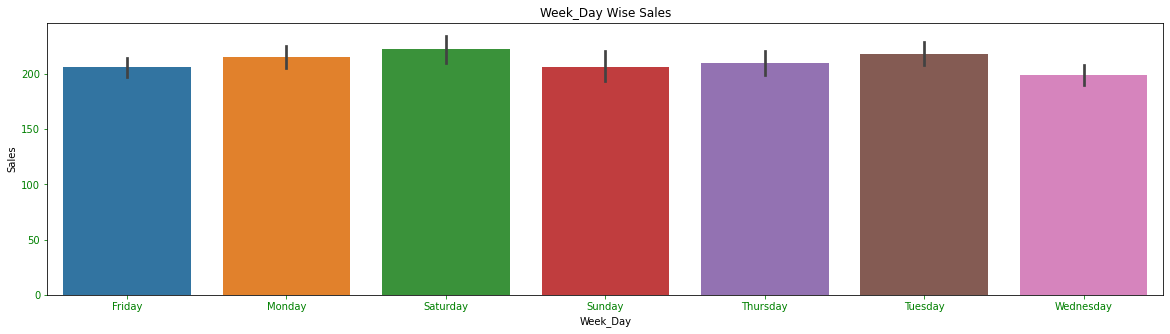

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x='Week_Day',y='Sales', data=Data)
plt.title('Week_Day Wise Sales')

                                                     EDA - Top 10 

Text(0.5, 0, 'Countries')

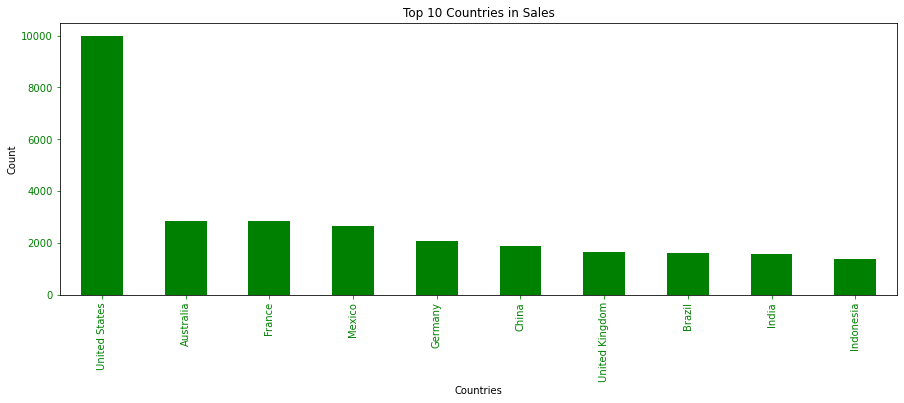

In [37]:
f1=pd.read_csv("D:\\anacoda dataset\\Retail.csv")
plt.figure(figsize=(15,5))
top10countries = f1.groupby('Country')['Row ID'].count().sort_values(ascending=False)
top10countries = top10countries [:10]
top10countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries in Sales')
plt.ylabel('Count')
plt.xlabel('Countries')

Text(0.5, 0, 'Product Name')

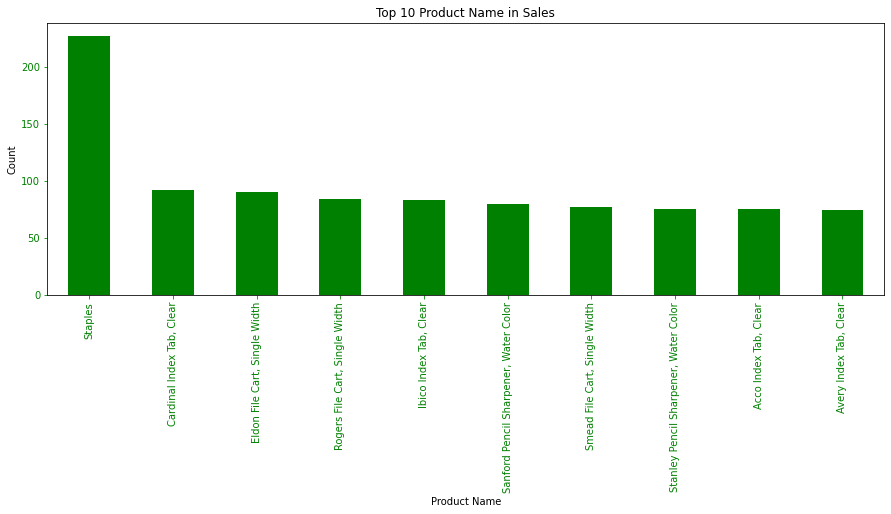

In [38]:
plt.figure(figsize=(15,5))
top10countries = f1.groupby('Product Name')['Row ID'].count().sort_values(ascending=False)
top10countries = top10countries [:10]
top10countries.plot(kind='bar', color='green')
plt.title('Top 10 Product Name in Sales')
plt.ylabel('Count')
plt.xlabel('Product Name')

Text(0.5, 0, 'Category')

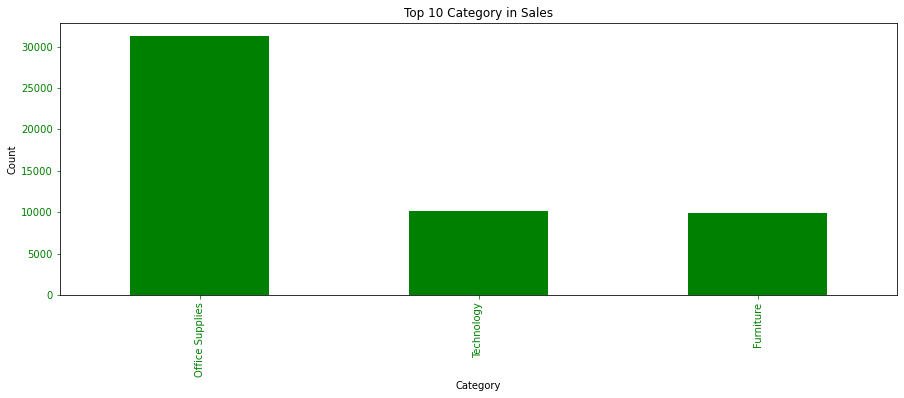

In [39]:
plt.figure(figsize=(15,5))
top10countries = f1.groupby('Category')['Row ID'].count().sort_values(ascending=False)
top10countries = top10countries [:10]
top10countries.plot(kind='bar', color='green')
plt.title('Top 10 Category in Sales')
plt.ylabel('Count')
plt.xlabel('Category')

Text(0.5, 0, 'Sub-Category')

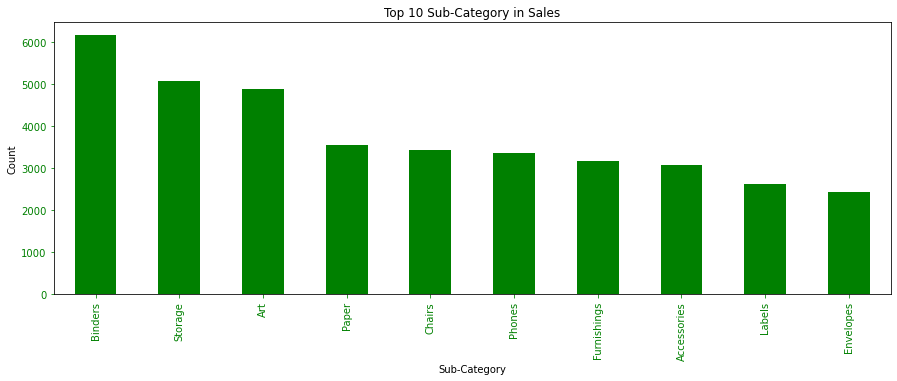

In [40]:
plt.figure(figsize=(15,5))
top10countries = f1.groupby('Sub-Category')['Row ID'].count().sort_values(ascending=False)
top10countries = top10countries [:10]
top10countries.plot(kind='bar', color='green')
plt.title('Top 10 Sub-Category in Sales')
plt.ylabel('Count')
plt.xlabel('Sub-Category')

Text(0.5, 0, 'Week_Day')

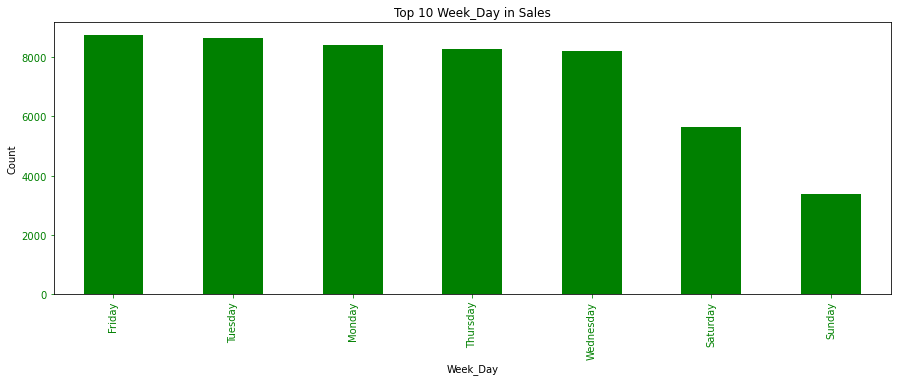

In [41]:
f1['Order Date']=pd.to_datetime(f1['Order Date'])
f1['Week_Day']=f1['Order Date'].dt.day_name()
plt.figure(figsize=(15,5))
top10countries = f1.groupby('Week_Day')['Row ID'].count().sort_values(ascending=False)
top10countries = top10countries [:10]
top10countries.plot(kind='bar', color='green')
plt.title('Top 10 Week_Day in Sales')
plt.ylabel('Count')
plt.xlabel('Week_Day')

In [42]:
#                                         Using OneHotEncoding Preprocessing 

Data=pd.get_dummies(Data,drop_first=True)
Data.head(2)

Sales  Quantity  Discount   Profit  Country_Albania  Country_Algeria  \
0  408.300         2       0.0  106.140                0                1   
1  120.366         3       0.1   36.036                0                0   

   Country_Angola  Country_Argentina  Country_Armenia  Country_Australia  ...  \
0               0                  0                0                  0  ...   
1               0                  0                0                  1  ...   

   Product Name_iOttie HLCRIO102 Car Mount  Product Name_iOttie XL Car Mount  \
0                                        0                                 0   
1                                        0                                 0   

   Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector  \
0                                                  0                   
1                                                  0                   

   Product Name_netTALK DUO VoIP Telephone Service  Week_Day_Monday  \
0                                                0                0   
1                                                0                0   

   Week_Day_Saturday  Week_Day_Sunday  Week_Day_Thursday  Week_Day_Tuesday  \
0                  1                0                  0                 0   
1                  1                0                  0                 0   

   Week_Day_Wednesday  
0                   0  
1                   0  

[2 rows x 3859 columns]

In [43]:
#                                           Extracting input data from Data

X_data=Data.drop(columns=['Sales'])
X_data

Quantity  Discount    Profit  Country_Albania  Country_Algeria  \
0             2       0.0  106.1400                0                1   
1             3       0.1   36.0360                0                0   
2             4       0.0   29.6400                0                0   
3             3       0.5  -26.0550                0                0   
4             5       0.1   37.7700                0                0   
...         ...       ...       ...              ...              ...   
29995         3       0.0   14.2632                0                0   
29996         5       0.0   82.5000                0                0   
29997         1       0.0   28.2300                0                0   
29998         2       0.4  -59.2000                0                0   
29999         3       0.1   -5.0220                0                0   

       Country_Angola  Country_Argentina  Country_Armenia  Country_Australia  \
0                   0                  0                0                  0   
1                   0                  0                0                  1   
2                   0                  0                0                  0   
3                   0                  0                0                  0   
4                   0                  0                0                  1   
...               ...                ...              ...                ...   
29995               0                  0                0                  0   
29996               0                  0                0                  0   
29997               0                  0                0                  0   
29998               0                  0                0                  0   
29999               0                  0                0                  0   

       Country_Austria  ...  Product Name_iOttie HLCRIO102 Car Mount  \
0                    0  ...                                        0   
1                    0  ...                                        0   
2                    0  ...                                        0   
3                    0  ...                                        0   
4                    0  ...                                        0   
...                ...  ...                                      ...   
29995                0  ...                                        0   
29996                0  ...                                        0   
29997                0  ...                                        0   
29998                0  ...                                        0   
29999                0  ...                                        0   

       Product Name_iOttie XL Car Mount  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
29995                                 0   
29996                                 0   
29997                                 0   
29998                                 0   
29999                                 0   

       Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector  \
0                                                      0                   
1                                                      0                   
2                                                      0                   
3                                                      0                   
4                                                      0                   
...                                                  ...                   
29995                                                  0                   
29996                                                  0                   
29997                                                  0                   
29998                      

In [44]:
#                                            Extracting output data from Data

Y_data=Data['Sales']

In [45]:
X_data.shape

(29016, 3858)

In [46]:
Y_data.shape

(29016,)

In [47]:
Y_data

0        408.300
1        120.366
2         66.120
3         44.865
4        113.670
          ...   
29995     50.940
29996    196.650
29997    148.590
29998     98.640
29999    225.828
Name: Sales, Length: 29016, dtype: float64

In [50]:
#                               Splitting of data into training data and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X_data, Y_data, test_size = 0.3, random_state = 0)

In [51]:
print(X_train.shape)
print(X_test.shape)

(20311, 3858)
(8705, 3858)


In [52]:
print(Y_train.shape)
print(Y_test.shape)

(20311,)
(8705,)


In [53]:
#                                        Creating a Deep Learning model using Keras

inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [54]:
#                                                      Training the model

model.compile(optimizer='adam', loss='mse')

history = model.fit(
                    X_train, Y_train, validation_split=0.2, batch_size=32, epochs=100, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                              tf.keras.callbacks.ReduceLROnPlateau()]
                   )

Epoch 1/100
508/508 [==============================] - 5s 8ms/step - loss: 63844.7773 - val_loss: 55902.1875 - lr: 0.0010
Epoch 2/100
508/508 [==============================] - 4s 7ms/step - loss: 50505.0156 - val_loss: 48553.5859 - lr: 0.0010
Epoch 3/100
508/508 [==============================] - 4s 7ms/step - loss: 44962.9531 - val_loss: 46484.1562 - lr: 0.0010
Epoch 4/100
508/508 [==============================] - 4s 7ms/step - loss: 39829.1484 - val_loss: 41358.1953 - lr: 0.0010
Epoch 5/100
508/508 [==============================] - 4s 7ms/step - loss: 35309.6562 - val_loss: 38374.2578 - lr: 0.0010
Epoch 6/100
508/508 [==============================] - 4s 7ms/step - loss: 30966.8789 - val_loss: 32887.6445 - lr: 0.0010
Epoch 7/100
508/508 [==============================] - 4s 7ms/step - loss: 28725.7266 - val_loss: 29371.3418 - lr: 0.0010
Epoch 8/100
508/508 [==============================] - 4s 7ms/step - loss: 24968.7441 - val_loss: 40450.3945 - lr: 0.0010
Epoch 9/100
508/508 [===

In [55]:
test_loss = model.evaluate(X_test, Y_test, verbose=0)

print("Test Loss: {:.5f}".format(test_loss))

Test Loss: 14469.84863


In [56]:
y_pred = np.squeeze(model.predict(X_test))
test_r2 = r2_score(Y_test, y_pred)

print("Test R^2 Score: {:.5f}".format(test_r2))

273/273 [==============================] - 1s 2ms/step
Test R^2 Score: 0.87501


In [57]:
pred=model.predict(X_test)

273/273 [==============================] - 1s 2ms/step


In [58]:
for j in pred:
    print(j)

[99.68527]
[86.64072]
[189.17107]
[2.5984492]
[36.620216]
[144.69653]
[172.19788]
[17.35895]
[143.70862]
[49.130177]
[338.61188]
[188.22572]
[62.525394]
[118.10222]
[145.18106]
[17.292303]
[19.931883]
[540.1585]
[514.31586]
[325.77982]
[105.95302]
[216.35272]
[40.92155]
[168.44028]
[436.59106]
[97.90456]
[468.98804]
[216.84128]
[68.593544]
[19.413992]
[84.20561]
[159.66956]
[1141.8705]
[253.26663]
[81.91397]
[214.07135]
[487.56827]
[18.453463]
[12.591302]
[211.6493]
[966.2303]
[37.690365]
[337.2554]
[12.118782]
[155.82053]
[20.282492]
[1038.2356]
[866.2887]
[41.02456]
[1003.57776]
[209.97043]
[30.43759]
[24.939142]
[212.65175]
[658.7338]
[1019.77155]
[1098.285]
[467.8]
[415.4404]
[895.2821]
[429.83356]
[928.4418]
[31.479733]
[1024.4672]
[99.20895]
[55.903816]
[71.15706]
[481.77368]
[233.55624]
[124.69566]
[36.70632]
[134.8714]
[237.58731]
[55.14864]
[849.58527]
[3.6505198]
[15.290489]
[497.04816]
[1802.9585]
[-0.8267217]
[23.485277]
[14.591653]
[1070.3666]
[122.4498]
[50.809303]
[21.38

[828.10284]
[247.29904]
[748.50446]
[216.70453]
[43.983654]
[81.294464]
[21.506845]
[37.7273]
[6.8780723]
[244.52228]
[46.154354]
[827.28937]
[204.2328]
[202.72365]
[67.604805]
[43.366405]
[35.854244]
[129.77977]
[343.80893]
[22.842602]
[10.353258]
[240.62044]
[14.879281]
[55.89955]
[89.08805]
[96.20263]
[53.445957]
[91.02759]
[609.16406]
[153.53625]
[26.29764]
[97.659775]
[3.2692409]
[216.69139]
[69.13895]
[95.95164]
[1341.8142]
[56.83514]
[283.9066]
[150.8724]
[118.827095]
[442.3122]
[81.360085]
[12.867776]
[8.43897]
[48.256924]
[1015.6802]
[12.964627]
[42.153618]
[25.981506]
[34.30649]
[46.53149]
[236.56586]
[48.9708]
[194.0356]
[60.000465]
[36.744957]
[52.55662]
[144.77841]
[131.48799]
[247.23169]
[133.2396]
[31.923483]
[39.36204]
[56.217587]
[30.845984]
[97.10991]
[87.71863]
[11.808645]
[728.7569]
[293.76108]
[30.91461]
[49.131203]
[49.568905]
[268.6564]
[241.97623]
[44.93434]
[139.67471]
[95.04537]
[494.1852]
[97.9041]
[14.088129]
[2428.3389]
[35.992825]
[228.89825]
[255.56487]
[

[76.40878]
[876.12994]
[91.55252]
[32.296925]
[9.592093]
[108.83853]
[7.6260757]
[80.11525]
[325.77682]
[82.22946]
[74.36345]
[2853.7668]
[160.24481]
[90.01636]
[67.1137]
[83.2807]
[31.488688]
[50.02976]
[26.091223]
[545.70795]
[30.26637]
[228.65428]
[386.6442]
[98.36625]
[217.29047]
[890.00616]
[41.059856]
[32.97511]
[445.9645]
[39.50582]
[50.560665]
[78.359695]
[38.708897]
[1518.7493]
[293.41788]
[16.500315]
[873.51044]
[61.49124]
[54.726727]
[112.08046]
[7.8186903]
[91.634735]
[80.75913]
[17.37417]
[370.22647]
[154.91304]
[512.4932]
[10.9939165]
[64.0232]
[178.6976]
[94.30321]
[220.6258]
[8.031917]
[314.39145]
[402.4777]
[669.1596]
[180.74707]
[27.33542]
[17.33653]
[152.38217]
[268.92657]
[75.47159]
[92.8003]
[42.53738]
[21.142332]
[11.08866]
[55.074947]
[96.829315]
[332.3961]
[1001.8129]
[224.24004]
[6.25661]
[67.50472]
[50.799953]
[45.399353]
[34.496174]
[290.36032]
[10.22881]
[14.644941]
[119.883286]
[6.1773453]
[23.424341]
[71.97348]
[505.41013]
[98.88484]
[110.1549]
[38.707485]

[1472.4734]
[41.577232]
[88.21023]
[158.56242]
[754.01764]
[93.64903]
[41.64105]
[22.273783]
[1042.615]
[216.3588]
[240.15651]
[36.430645]
[12.4747305]
[23.831919]
[550.94586]
[127.911095]
[598.7304]
[36.76209]
[13.807506]
[99.79636]
[58.87756]
[879.2904]
[6.908418]
[986.2975]
[68.988525]
[13.908768]
[78.94257]
[23.067425]
[17.707678]
[20.589588]
[213.69516]
[318.0964]
[35.875324]
[7.9437194]
[342.68857]
[220.15338]
[58.93991]
[86.92079]
[62.760567]
[90.679306]
[18.571337]
[238.36172]
[119.18424]
[33.566616]
[126.17917]
[1444.3755]
[447.08286]
[247.5021]
[89.44905]
[53.869762]
[192.60907]
[9.7538185]
[1124.5948]
[20.38923]
[108.53279]
[125.4566]
[230.28574]
[76.721825]
[27.06794]
[17.968777]
[681.3532]
[6.0977273]
[189.98215]
[279.05682]
[289.2395]
[83.06112]
[39.078506]
[238.18974]
[195.89207]
[149.44582]
[32.042046]
[32.551373]
[10.714451]
[457.3852]
[67.3185]
[238.14545]
[60.584476]
[66.1351]
[62.72639]
[45.26883]
[18.965143]
[8.964774]
[20.794266]
[657.9644]
[31.652086]
[540.0209]


[527.3296]
[315.4]
[14.346376]
[15.061683]
[429.27567]
[55.056957]
[1914.5317]
[1024.4512]
[627.45294]
[182.15286]
[339.07162]
[46.866486]
[16.87347]
[18.09868]
[47.738144]
[176.45822]
[74.0047]
[278.85608]
[565.17975]
[78.36952]
[50.715527]
[207.55775]
[189.5474]
[213.0857]
[317.02487]
[158.54428]
[275.2436]
[32.03272]
[72.991264]
[58.987713]
[395.74808]
[16.371864]
[25.871223]
[287.2222]
[275.13248]
[88.267685]
[1025.1677]
[4.2409997]
[26.175306]
[156.59264]
[4.0334735]
[174.14688]
[37.245]
[241.33241]
[-0.22165641]
[10.946433]
[391.14468]
[441.41125]
[20.078829]
[573.5263]
[39.71486]
[368.14975]
[44.857456]
[170.1922]
[136.26207]
[86.82851]
[25.393116]
[56.68451]
[1641.6569]
[98.19579]
[149.64938]
[19.445606]
[63.258907]
[10.223826]
[92.30518]
[190.27904]
[167.80183]
[39.57806]
[666.8222]
[35.122974]
[50.39655]
[16.751371]
[4.9508195]
[40.438683]
[29.026329]
[411.11502]
[40.666973]
[167.94699]
[227.70207]
[237.7579]
[3.671259]
[425.52206]
[196.43462]
[129.07248]
[46.859856]
[25.4022

[20.031837]
[746.3407]
[122.98265]
[51.27413]
[42.268894]
[801.9732]
[123.07055]
[41.01165]
[25.489483]
[436.13614]
[44.674084]
[75.45438]
[50.559692]
[102.70758]
[34.642006]
[611.73566]
[26.773066]
[19.4477]
[16.463488]
[45.22401]
[52.65591]
[30.858093]
[96.24907]
[171.57205]
[22.917896]
[71.25203]
[1375.6755]
[6.318441]
[206.64581]
[60.06909]
[191.41171]
[11.600269]
[848.5135]
[279.4614]
[266.70932]
[43.035732]
[184.59686]
[18.877602]
[55.94815]
[23.218094]
[27.690798]
[17.031048]
[523.5414]
[134.57634]
[82.020615]
[116.80248]
[804.94495]
[259.623]
[5.810732]
[102.90416]
[36.15127]
[207.8429]
[4.899705]
[176.71823]
[853.7875]
[671.0497]
[38.383327]
[2016.6373]
[38.167496]
[144.07289]
[78.826805]
[56.5703]
[1060.014]
[24.699306]
[25.67847]
[20.200626]
[132.09628]
[50.341198]
[98.30648]
[7.4699774]
[42.118214]
[473.14426]
[193.9296]
[18.54696]
[43.563526]
[446.23746]
[10.389016]
[28.068052]
[155.99954]
[748.645]
[67.502014]
[227.48285]
[17.585619]
[27.400059]
[146.89722]
[850.00995]
[3

[419.486]
[22.8332]
[22.932928]
[201.50412]
[397.7013]
[780.45624]
[1662.398]
[35.812767]
[34.019825]
[565.33307]
[40.967747]
[124.48927]
[346.83646]
[131.6684]
[170.04906]
[154.21664]
[761.73395]
[27.144733]
[65.991684]
[66.42808]
[1006.06384]
[49.20489]
[195.02095]
[27.78174]
[40.86067]
[31.410099]
[611.28937]
[144.26068]
[194.04129]
[43.67921]
[107.517654]
[51.693645]
[106.91232]
[30.136976]
[6.2307377]
[13.665425]
[168.521]
[731.19745]
[5.361694]
[200.19965]
[860.36383]
[1254.9586]
[24.72124]
[1112.8091]
[144.78441]
[95.08522]
[215.35367]
[1132.689]
[321.74942]
[489.1865]
[223.87187]
[86.07818]
[36.797302]
[28.516516]
[281.42493]
[285.6152]
[1.4579881]
[38.94827]
[75.420975]
[178.00711]
[793.93414]
[77.654594]
[22.273546]
[39.566494]
[5.603902]
[67.51773]
[593.84735]
[4.8334527]
[696.79706]
[158.64304]
[44.698837]
[123.64298]
[319.591]
[276.9249]
[1227.6266]
[74.652016]
[176.3519]
[118.59113]
[177.92003]
[92.79715]
[35.76625]
[51.746616]
[113.02974]
[18.123392]
[185.49675]
[47.9136

[587.38586]
[134.91281]
[36.42128]
[242.14987]
[14.608351]
[43.771893]
[50.737698]
[140.42545]
[21.335224]
[32.820076]
[7.4528728]
[2.489421]
[89.458244]
[257.23514]
[121.59044]
[66.67682]
[969.67883]
[150.06679]
[382.5973]
[25.571684]
[2368.6882]
[17.960295]
[30.292887]
[168.05981]
[287.8473]
[179.60097]
[42.079823]
[407.94153]
[15.546891]
[762.2199]
[473.61063]
[152.16052]
[187.32227]
[218.41652]
[108.52556]
[15.934043]
[60.183308]
[200.65048]
[587.7614]
[314.52963]
[39.858673]
[86.01758]
[53.306595]
[11.114231]
[93.06253]
[116.16575]
[366.68045]
[1761.5162]
[646.0834]
[1572.4724]
[1063.5577]
[176.53204]
[211.2454]
[190.29802]
[32.96103]
[62.368893]
[19.097692]
[165.25342]
[181.49634]
[8.360206]
[48.482445]
[681.96466]
[25.218096]
[23.37849]
[191.76428]
[165.66441]
[68.850876]
[69.52331]
[81.19331]
[236.1087]
[326.1351]
[801.2696]
[112.49156]
[142.64995]
[40.516827]
[88.23582]
[53.16623]
[31.998487]
[88.29747]
[201.91608]
[21.403831]
[106.213394]
[255.7871]
[1012.27655]
[109.450264]


[415.59677]
[47.487213]
[73.79721]
[319.26645]
[28.281792]
[57.669464]
[32.178417]
[962.6354]
[533.94995]
[232.9667]
[29.819273]
[379.83374]
[24.224976]
[15.378136]
[74.582634]
[342.03293]
[55.57883]
[182.40984]
[229.648]
[48.7859]
[148.73026]
[312.75357]
[83.09076]
[22.97281]
[109.01376]
[4.980892]
[15.368716]
[107.807014]
[446.31888]
[176.01363]
[26.01637]
[138.3225]
[1002.43866]
[13.254338]
[256.0832]
[106.33738]
[164.06204]
[1041.4541]
[40.607708]
[376.01492]
[86.6958]
[1376.3102]
[388.8055]
[49.330208]
[1208.6481]
[101.16789]
[46.053238]
[41.122406]
[929.17975]
[44.08603]
[101.9183]
[73.12926]
[49.974545]
[399.22696]
[160.43585]
[153.04266]
[245.44762]
[311.00494]
[57.874996]
[88.29926]
[170.54831]
[183.25946]
[269.1913]
[34.34966]
[46.640137]
[20.650074]
[57.776417]
[34.150303]
[110.59088]
[653.915]
[49.359997]
[73.3365]
[93.578156]
[21.128187]
[79.728325]
[28.97945]
[77.22718]
[993.6141]
[63.937305]
[9.268141]
[32.06123]
[181.6326]
[541.3559]
[392.44052]
[65.919395]
[82.66986]
[

[129.5789]
[140.48242]
[103.19529]
[59.941635]
[330.74124]
[576.6193]
[13.271223]
[8.603028]
[38.051655]
[35.79878]
[142.2938]
[503.31348]
[582.7584]
[132.93173]
[417.87552]
[49.9361]
[65.83143]
[6.7046847]
[36.67015]
[110.316025]
[217.85786]
[10.326904]
[17.040901]
[70.88325]
[31.713793]
[163.80183]
[170.27284]
[83.7519]
[8.2251215]
[51.081203]
[23.427614]
[13.518388]
[1080.3235]
[56.11685]
[61.044956]
[63.571144]
[45.615936]
[141.19095]
[77.466]
[861.6082]
[1320.7474]
[2.5496974]
[914.8847]
[24.0528]
[245.16313]
[52.50765]
[450.3071]
[28.411814]
[732.20087]
[11.5285015]
[76.458176]
[420.12534]
[9.465471]
[50.471893]
[17.690948]
[13.532052]
[36.05731]
[13.362564]
[1031.2017]
[78.82461]
[4.2229476]
[11.2204075]
[583.2093]
[44.37801]
[39.535004]
[32.880306]
[43.83638]
[57.135082]
[183.94873]
[920.59674]
[784.6908]
[32.37519]
[1062.253]
[86.66425]
[10.080784]
[96.64934]
[1175.7279]
[130.09023]
[96.27386]
[15.092891]
[18.795471]
[124.30809]
[5.967047]
[193.10773]
[26.171597]
[266.98758]
[

[113.05861]
[31.6701]
[387.66885]
[37.709892]
[240.49594]
[99.70598]
[559.4482]
[40.83088]
[177.92474]
[13.920851]
[81.81289]
[113.392105]
[2.7021403]
[217.24948]
[292.1659]
[1228.223]
[33.685436]
[156.14926]
[22.93033]
[613.0285]
[64.5424]
[12.049153]
[37.880096]
[6.447889]
[229.54333]
[474.54642]
[25.81435]
[95.50107]
[230.46371]
[67.53705]
[821.515]
[596.336]
[259.94955]
[216.6423]
[16.205969]
[1292.3947]
[62.865078]
[15.958025]
[455.26974]
[199.21434]
[175.43907]
[117.89318]
[40.271038]
[144.0018]
[14.978815]
[97.37895]
[35.07703]
[19.171026]
[178.61746]
[532.0004]
[100.24077]
[440.52097]
[19.52876]
[45.35934]
[41.9298]
[20.724436]
[18.648813]
[77.03234]
[31.765944]
[108.350204]
[241.3044]
[169.22748]
[987.8173]
[706.1027]
[448.9421]
[60.04614]
[45.779873]
[223.20357]
[425.96484]
[23.10262]
[119.3528]
[141.42625]
[14.450963]
[801.4533]
[51.17264]
[152.64429]
[112.85443]
[157.9234]
[168.26941]
[30.427912]
[44.374424]
[390.5029]
[40.148296]
[169.02405]
[20.769957]
[18.557568]
[31.115

In [59]:
for i in Y_test:
    print(i)

79.99
87.3
213.3
4.884
38.88
217.512
165.078
16.9335
153.657
53.91
256.56
207.69736
49.5
96.6
123.7032
16.9
17.61
476.49
933.4014
231.39
133.392
270.378
42.45
167.58
418.8
117.6
506.5848
249.18
54.66
12.72
84.0
139.59
1097.544
301.77
76.92
229.86
303.57
12.5769
10.74
248.13
529.47
19.2
442.764
10.92
166.44
78.408
1178.01
1181.0325
45.21
1144.2048
139.5
30.15
27.0
174.23084
863.128
2266.1475
873.0
443.808
442.32
821.52
370.251
635.96
44.55
1136.43
87.768
54.544
74.7
443.92
325.8
133.2
43.956
113.94
251.79
51.66
634.74
2.912
15.648
441.774
2097.12
2.88
16.53
15.232
1192.56
81.66
30.816
22.896
551.4
13.9761
27.24
92.46
19.752
145.962
306.84
43.68
16.02
1037.19
24.78
42.0
445.2
38.88
286.86
34.344
418.35
21.735
140.736
23.04
24.72
283.92
192.528
136.584
243.648
358.668
2052.54
48.3
71.6
8.688
121.1634
134.6094
11.88
120.744
284.8274
50.436
50.76
10.476
29.1
136.784
138.96
60.57
35.856
96.36
160.578
19.98
8.32
795.6
70.4
11.97
449.874
90.48
116.1
104.436
80.736
40.68
43.02
38.976
354.72
4.7

122.892
622.14
13.86
11.472
284.48988
140.976
41.2
9.92
413.52
306.32
26.4
248.88
2534.0175
218.75
59.752
53.12
169.95
66.9
437.67
141.888
17.4
1361.043
3.768
93.18
22.14
40.152
167.328
58.4166
4.644
26.82
32.1
172.752
501.248
87.48
137.16
32.328
279.9
13.26
62.775
215.52
72.45
1275.12
373.68
85.905
828.96
224.04
21.6
10.68
12.36
37.64
53.823
204.63
110.187
218.592
505.90616
149.6
183.36
46.416
11.824
17.94
52.56
84.8
1262.925
485.28
288.24
23.98
16.02
50.46
340.65
109.8054
56.0
155.7
9.69
346.5
31.2
20.064
45.432
86.94
168.24
26.064
387.36
1275.0
13.11
735.66
32.13
215.544
1283.52
671.93
213.228
13.12
5.682
17.48
79.47
10.58
91.77
201.69
509.88
105.18
10.53
103.38
870.588
31.5456
4.014
28.95
45.28
18.588
99.568
71.28
297.84
9.585
85.12
585.98568
1001.76
225.296
10.584
532.8
449.91
20.37
1297.62
674.4
107.4
244.8
107.44
197.856
54.69
25.4916
24.96
63.24
4.149
2124.72
156.744
21.72
1000.26
546.0
357.36
900.234
46.71
104.23
10.08
17.472
162.576
170.14956
148.104
53.775
39.12
16.2
33.024


56.9214
302.94
3.26
143.97
24.0
661.851
246.48
8.478
72.09
298.26
105.6
6.688
125.235
44.79
48.72
21.54
66.528
22.23
39.78
1649.75
8.376
112.32
149.97
42.93
16.038
23.88
900.207
659.168
36.84
43.404
56.3
164.88
66.096
125.76
32.0
12.672
18.804
17.9
48.69
1147.23
88.83
480.69
158.22
266.496
29.4
21.24
712.65
407.232
204.768
163.1
19.44
243.33
146.448
280.3275
108.56
343.656
204.63
105.72
55.908
142.47
424.2
49.92
7.29
13.32
6.66
1220.31
42.12
99.108
77.88
529.32
87.06
45.45
20.784
760.2
39.96
284.1
45.54
16.02
22.6
607.824
114.21
110.11
28.35
15.28
97.632
62.5
1079.784
9.64
972.567
87.76
13.29
64.38
24.0
24.56
16.86
218.16
273.3
20.004
5.76
263.31
214.95
69.861
100.68
132.84
102.9
18.98
229.62
116.52
37.8
101.88
1162.485
335.583
284.94
88.074
60.84
171.87
4.77
1371.42
14.22
121.5
103.08
184.76
73.44
20.416
4.86
516.0
8.128
194.4
287.24436
156.456
80.58
44.1
241.568
258.15
139.152
32.85
40.68
10.688
498.744
77.49
201.312
25.0266
70.56
61.47
38.9709
15.84
10.47
11.22
667.539
28.44
429.6
4

19.8
239.97
30.456
37.52
49.44
1810.3
17.52
670.14
81.088
11.13
38.7693
108.36
79.533
74.52
68.112
122.22
209.148
10.26
87.03
36.288
110.12
31.152
74.76
1.944
49.14
51.21
32.208
185.76
66.42
61.344
117.7872
4.329
34.236
363.3
49.536
20.04
246.9
2166.8976
9.4
128.85
167.34
29.6
105.48
49.59
21.42
43.254
4.347
1484.544
8.25
49.296
238.2
16.5
1900.584
102.9
12.39
149.6
17.072
8.232
80.1
487.6
9.328
607.92
146.4
43.92
14.72
259.136
1801.632
40.32
811.28
50.22
163.5
117.96
69.84
65.22
1236.33
31.32
73.71
126.08
437.34
261.468
1278.0
219.28
10.707
62.34
207.36
391.86
116.235
6.228
59.97
84.9
1244.187
37.392
93.024
409.32
28.44
50.04
15.96
1386.63
512.96
398.52
205.24
39.96
16.08
299.9
57.15
313.74
7.353
141.03
2.475
356.238
30.6711
8.56
360.288
967.552
37.8
298.44
382.4
139.14
48.4
33.9624
55.92
145.17
70.26
443.0706
96.84
62.64
12.96
63.1215
28.56
18.87
33.568
148.2516
95.202
38.664
82.848
141.3
640.74
38.52
146.475
34.02
1282.8
74.52
160.272
141.825
332.64
11.67
155.88
845.904
18.09
125.22

242.352
59.8794
131.223
13.872
50.82
91.68
340.38
331.452
15.92
75.96
25.36
45.72
24.084
367.83
220.08
89.73
1603.071
99.592
9.69
208.332
159.98
95.28
39.96
1.845
9.6
254.85
1236.33
365.22
18.99
11.46
58.2
45.98
14.022
6.52
13.44
49.77
908.608
651.348
8.064
546.588
7.712
115.0131
222.56
34.2
22.5
221.4
342.09
55.92
22.14
308.499
283.26
64.7649
187.88
68.2011
4.96
30.21
13.56
67.7
43.8
33.0
91.134
95.42
69.98
10.816
2120.8
331.02
6.48
98.64
239.92
146.79
356.562
269.36
339.18
84.784
13.992
142.47
28.92
5.344
11.08
432.6
71.361
21.84
89.478
451.2
44.048
369.28
13.2
11.808
45.4176
54.4
171.42
133.29
51.6
8.91
26.1
26.85
66.0
822.906
121.92
36.75
1421.52
1088.235
59.96
32.568
2442.069
3.618
141.912
165.888
71.96
41.424
7.056
1097.28
24.984
698.85
148.92
37.68
274.8
14.31
40.86
38.52
229.56
27.32
30.48
9.344
5.352
92.64
334.88
146.82
60.56
1058.25
194.4
327.76
26.91
2968.98
1.752
32.508
112.584
362.136
168.0
38.43
390.42
6.27
90.64
571.374
137.84
218.64
225.24
93.0969
7.12
67.78
237.75
309.

2818.08
230.88
681.72
40.0
34.58
117.0
13.296
41.904
20.22
53.28
44.4
146.121
293.58
111.024
191.85552
13.32
26.96
7.752
100.26
157.8225
32.4
167.82
40.83
1022.256
20.16
571.374
59.52
309.6
40.96
24.18
266.4
228.96
52.86
379.7388
528.43
53.04
22.288
43.56
775.278
45.15
53.08
81.24
26.88
723.72
29.6
15.33
44.22
13.86
11.784
25.5474
8.46
79.4
592.3
16.52
756.6
42.96
29.9
10.68
307.44
23.385
290.142
126.9
43.4265
37.32
170.072
14.88
141.507
13.62
9.045
23.55
107.982
23.84
86.96
11.36
11.43
1272.6
49.32
68.22
134.61
117.84
108.51
80.352
275.928
666.248
12.96
4.095
31.984
35.24
112.833
537.705
714.312
74.304
396.18
22.96
79.512
36.384
42.039
106.1055
264.816
8.37
14.52
84.12
35.44
69.576
140.436
60.48
23.232
35.28
21.06
11.07
721.875
41.835
88.56
89.6
44.01
162.6093
79.8294
877.905
713.61
5.328
731.472
29.1
264.384
22.96
497.7
27.27
659.9
14.652
62.58
306.78
8.847
55.14
21.816
11.0
28.38
16.98
1023.12
31.984
3.28
7.712
780.3
46.92
38.4345
40.176
44.1
48.09
195.93
1058.1
727.536
32.04
1076.5